In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


1.10.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [12]:
train_images.shape

(60000, 28, 28)

In [13]:
len(train_images)

60000

In [14]:
test_images.shape

(10000, 28, 28)

In [15]:
len(test_images)

10000

In [16]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

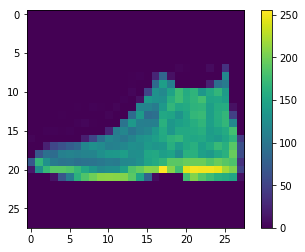

In [22]:
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)

In [23]:
train_images = train_images/255.0

In [24]:
test_images =test_images/255.0

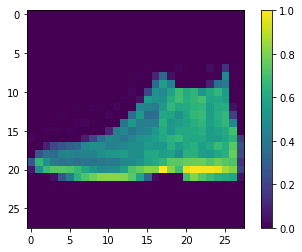

In [25]:
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)

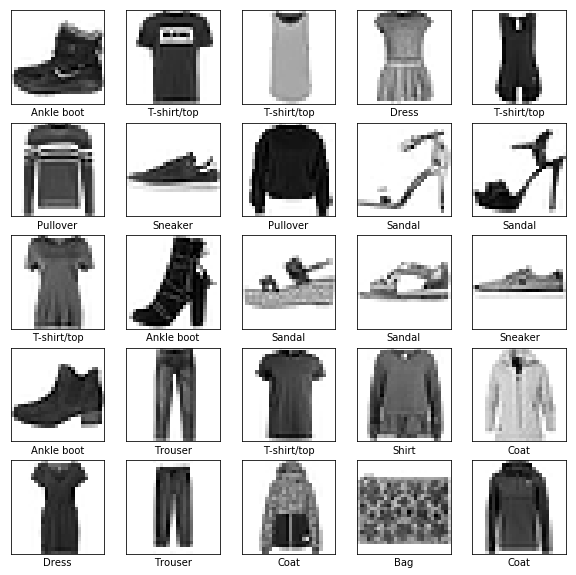

In [30]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])


In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [32]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.3789 - acc: 0.8639
Epoch 2/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.3394 - acc: 0.8754
Epoch 3/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.3154 - acc: 0.8841
Epoch 4/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.2955 - acc: 0.8916
Epoch 5/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.2834 - acc: 0.8943


In [38]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 27us/step


In [40]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8727


In [41]:
predictions = model.predict(test_images)


In [42]:
predictions[0]

array([5.25062251e-06, 1.93750722e-08, 2.91992365e-06, 5.49937305e-08,
       1.09759612e-05, 1.15858875e-02, 1.40568627e-05, 2.68150195e-02,
       2.31690647e-05, 9.61542666e-01], dtype=float32)

In [43]:
predictions.shape

(10000, 10)

In [44]:
np.argmax(predictions[0])

9

In [45]:
test_labels[0]

9

In [46]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

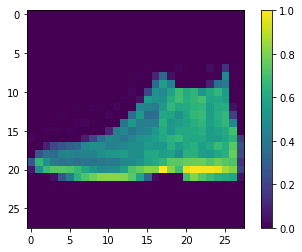

In [49]:
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)

In [50]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


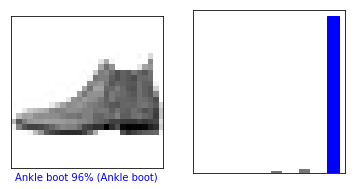

In [51]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

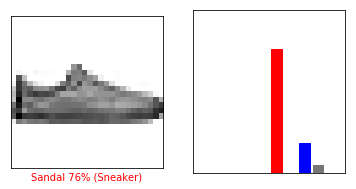

In [52]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

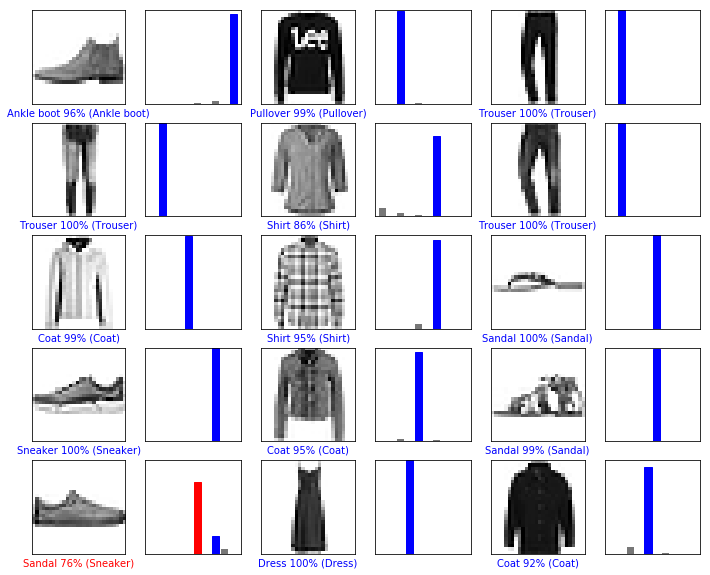

In [53]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [54]:
img = test_images[0]
print(img.shape)

img = (np.expand_dims(img,0))
print(img.shape)

(28, 28)
(1, 28, 28)


In [55]:
predictions_single = model.predict(img)

print(predictions_single)


[[5.2506225e-06 1.9374996e-08 2.9199182e-06 5.4993521e-08 1.0975950e-05
  1.1585870e-02 1.4056850e-05 2.6814990e-02 2.3169021e-05 9.6154267e-01]]


In [57]:
class_names[np.argmax(predictions_single)]

'Ankle boot'

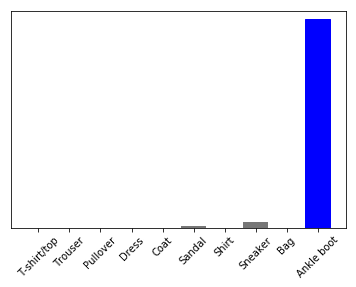

In [58]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
